# Did instructors set more assignments overrides after Covid-19? 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as ticker
import json
import sys
sys.path.insert(0, '/home/jenny/remote_learning_code_Spring_2017-2020')
from utils import parse_args


sys.argv = ['-f']
args = parse_args()

term_20 = args.semester_2020_Spring
start_date_20 = args.start_date_2020_Spring
remote_date_20 = args.remote_date_2020_Spring
end_date_20 = args.end_date_2020_Spring

term_19 = args.semester_2019_Spring
start_date_19 = args.start_date_2019_Spring
cutoff_date_19 = args.cutoff_date_2019_Spring
end_date_19 = args.end_date_2019_Spring

term_18 = args.semester_2018_Spring
start_date_18 = args.start_date_2018_Spring
cutoff_date_18 = args.cutoff_date_2018_Spring
end_date_18 = args.end_date_2018_Spring

term_17 = args.semester_2017_Spring
start_date_17 = args.start_date_2017_Spring
cutoff_date_17 = args.cutoff_date_2017_Spring
end_date_17 = args.end_date_2017_Spring

f = open('../assignment_with_submission.json',)
assignments_with_submission = json.load(f)['assignment_id']

In [3]:
def assignments_override_proactive(term, start_date, end_date):
    # load assignments
    assignments = pd.read_csv(args.assignments, sep='\t', header=0)
    assignments = assignments.loc[assignments['assignment_id'].isin(assignments_with_submission), ['assignment_id', 'asn_due_at', 'asn_unlock_at']]  # no duplicate exists

    # calcuate assignments overrides before and after covid
    assignments_overrides = pd.read_csv(args.assignments_overrides, sep='\t', header=0)
    assignments_overrides = assignments_overrides.loc[assignments_overrides['workflow_state']=='active']
    assignments_overrides = assignments_overrides.loc[assignments_overrides['term_name']==term]
    # merge assignments with overrides
    assignments_overrides = pd.merge(assignments_overrides, assignments, on='assignment_id', how='inner')
    assignments_overrides = assignments_overrides.loc[(assignments_overrides['due_at'].notnull())&(assignments_overrides['created_at']<=assignments_overrides['asn_unlock_at']), ['assignment_id', 'due_at', 'set_type', 'title', 'created_at', 'unlock_at', 'updated_at']]
    assignments_overrides['created_at'] = pd.to_datetime(assignments_overrides['created_at'], format='%Y-%m-%d %H:%M:%S.%f')
    #overrides_before = assignments_overrides.loc[(assignments_overrides['created_at']>'2020-01-14')&(assignments_overrides['created_at']<'2020-03-01')]

    # number of overrides per day before and after 2020-03-01
    #print('number of overrides per day before covid-19: ', len(overrides_before) / ((pd.to_datetime('2020-03-01') - pd.to_datetime('2020-01-14')) / np.timedelta64(1, 'D')))
    #overrides_after = assignments_overrides.loc[(assignments_overrides['created_at']>'2020-03-01')&(assignments_overrides['created_at']<'2020-05-25')]
    #print('number of overrides per day after covid-19: ', len(overrides_after) / ((pd.to_datetime('2020-5-25') - pd.to_datetime('2020-03-01')) / np.timedelta64(1, 'D')))
    assignments_overrides = assignments_overrides.loc[(assignments_overrides['created_at']>=start_date)&(assignments_overrides['created_at']<=end_date)]
    assignments_overrides['created_at'] = assignments_overrides['created_at'].apply(lambda x: x.date())
    time = assignments_overrides.groupby('created_at').size().reset_index()
    return time

overrides_time_20 = assignments_override_proactive(term_20, start_date_20, end_date_20)
overrides_time_19 = assignments_override_proactive(term_19, start_date_19, end_date_19)
overrides_time_18 = assignments_override_proactive(term_18, start_date_18, end_date_18)
overrides_time_17 = assignments_override_proactive(term_17, start_date_17, end_date_17)

In [4]:
overrides_time_20.set_index('created_at', inplace=True)
overrides_time_19['created_at'] = overrides_time_19['created_at'].apply(lambda x: x.replace(year=2020))
overrides_time_19.set_index('created_at', inplace=True)
overrides_time_18['created_at'] = overrides_time_18['created_at'].apply(lambda x: x.replace(year=2020))
overrides_time_18.set_index('created_at', inplace=True)
overrides_time_17['created_at'] = overrides_time_17['created_at'].apply(lambda x: x.replace(year=2020))
overrides_time_17.set_index('created_at', inplace=True)

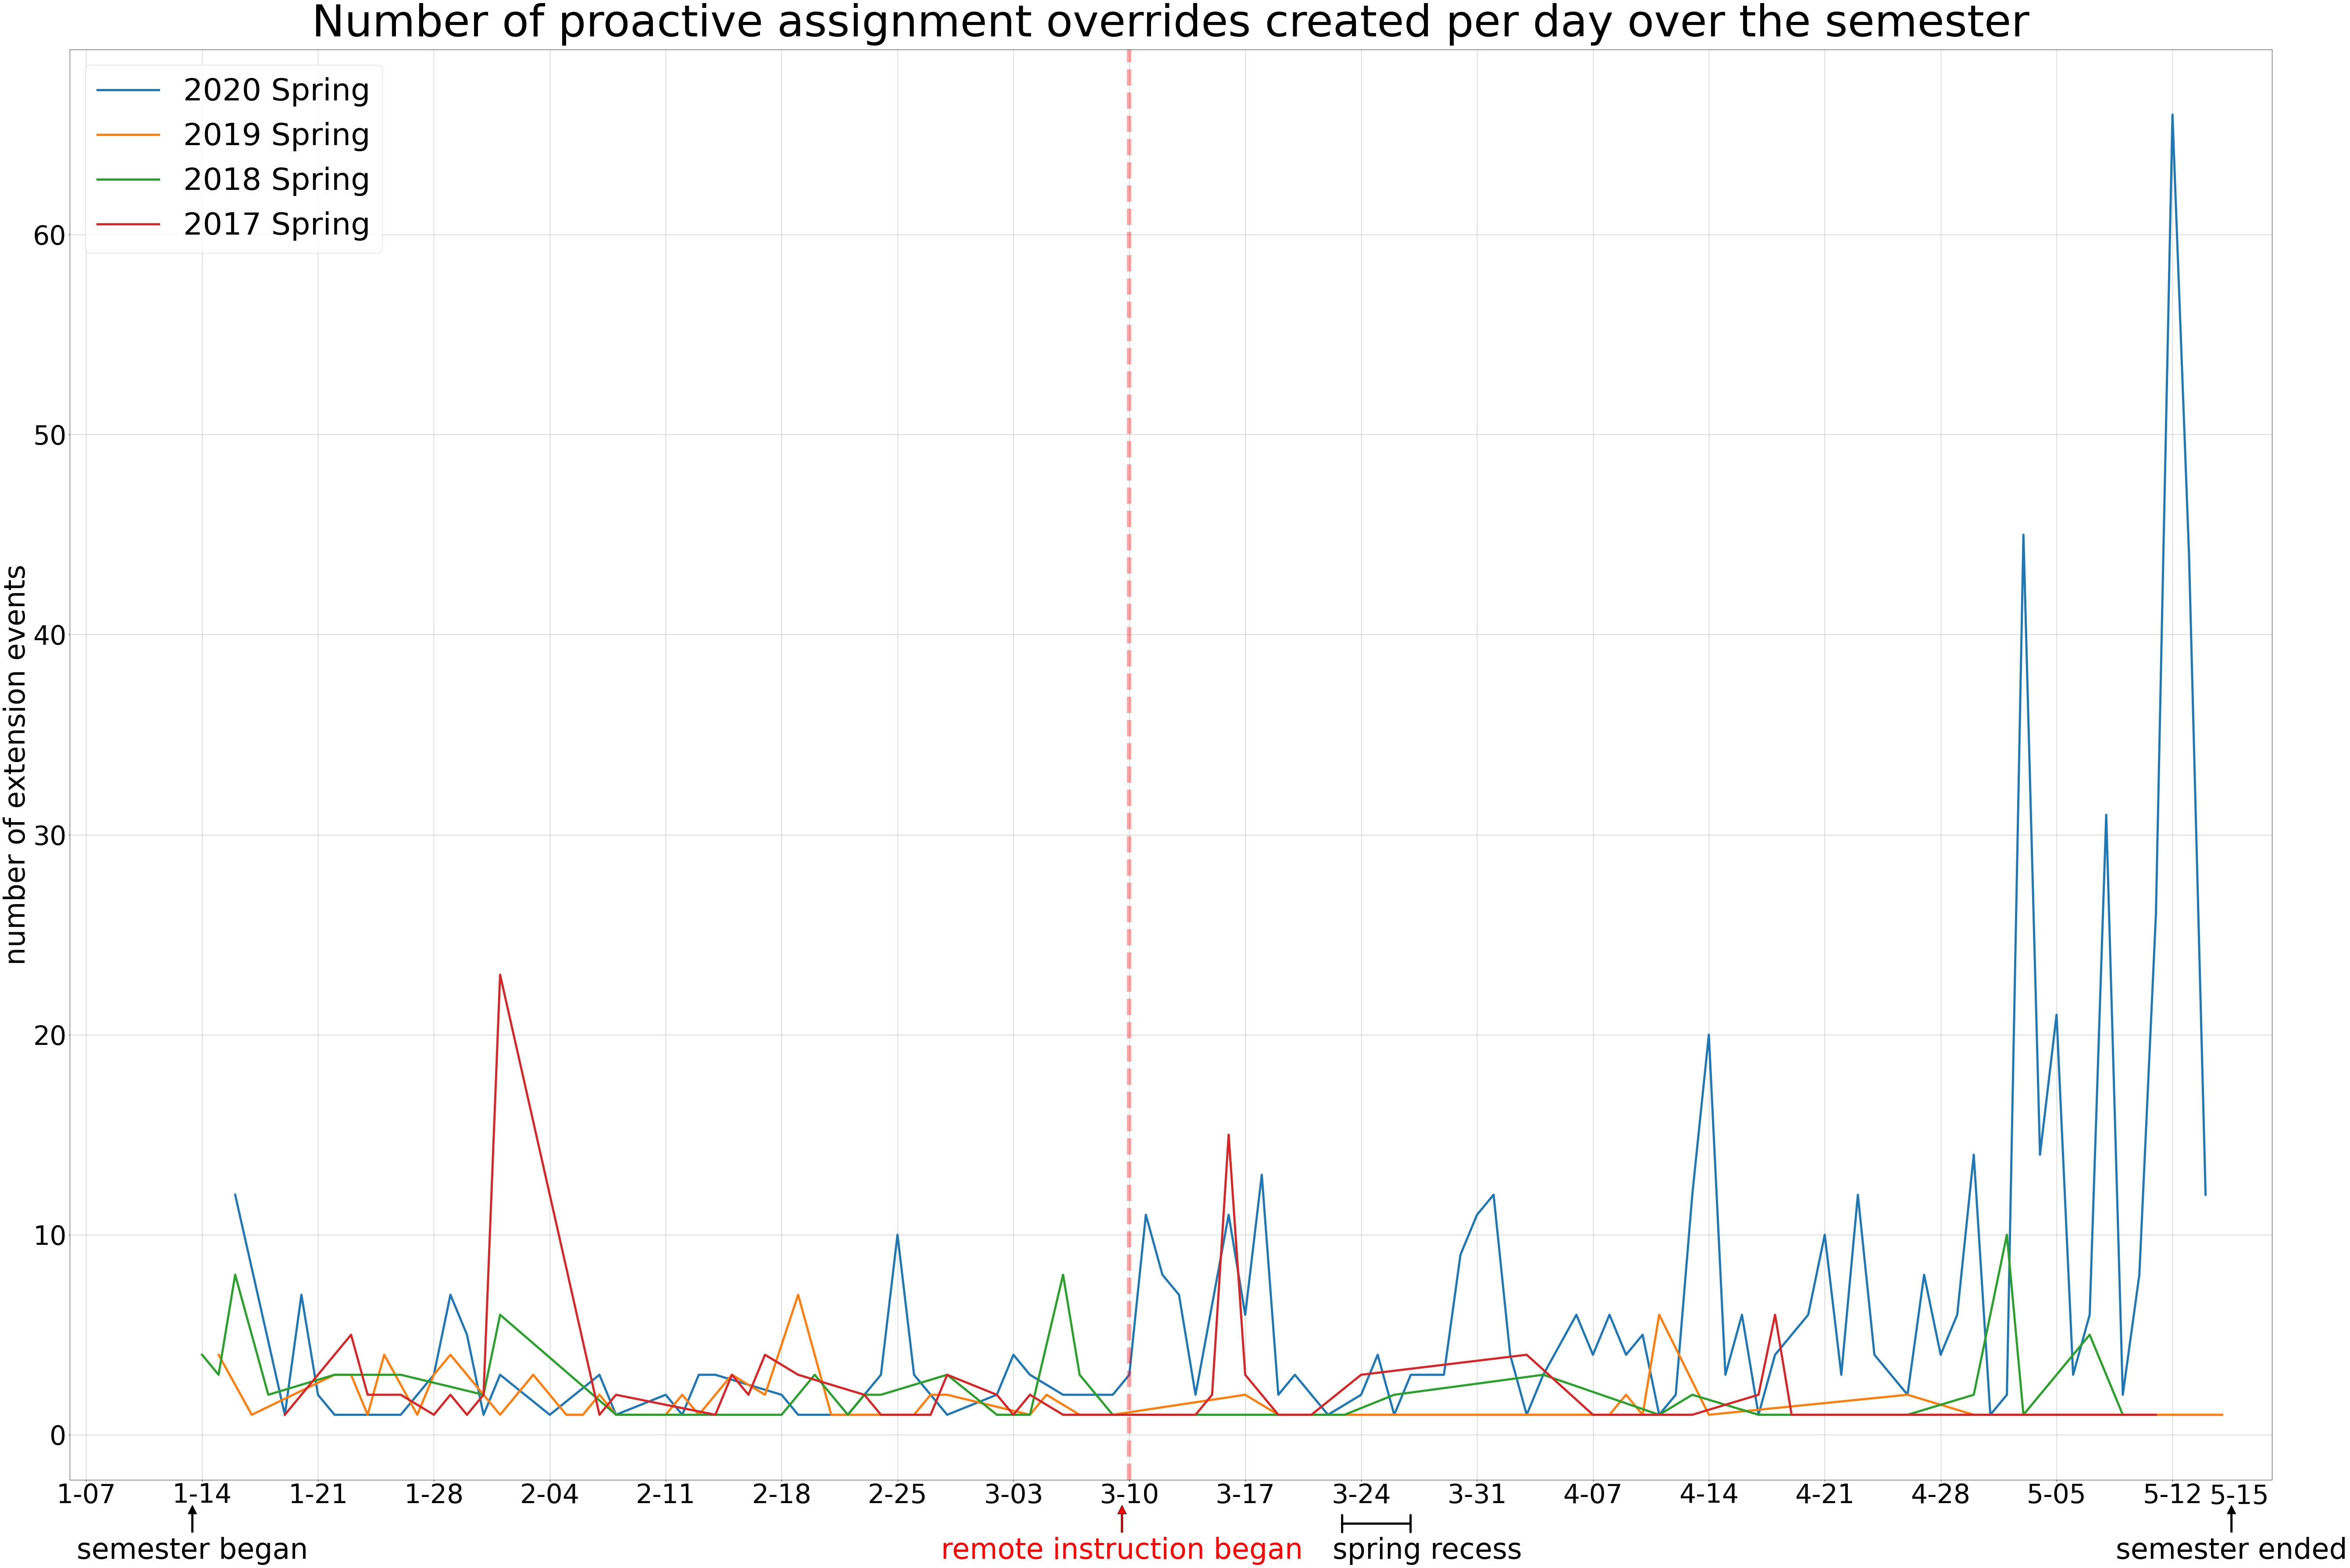

In [6]:

# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(overrides_time_20, linewidth=5.0, label='2020 Spring')
plt.plot(overrides_time_19, linewidth=5.0, label='2019 Spring')
plt.plot(overrides_time_18, linewidth=5.0, label='2018 Spring')
plt.plot(overrides_time_17, linewidth=5.0, label='2017 Spring')

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Number of proactive assignment overrides created per day over the semester', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of extension events', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
plt.legend(prop={'size': 70})
plt.show()

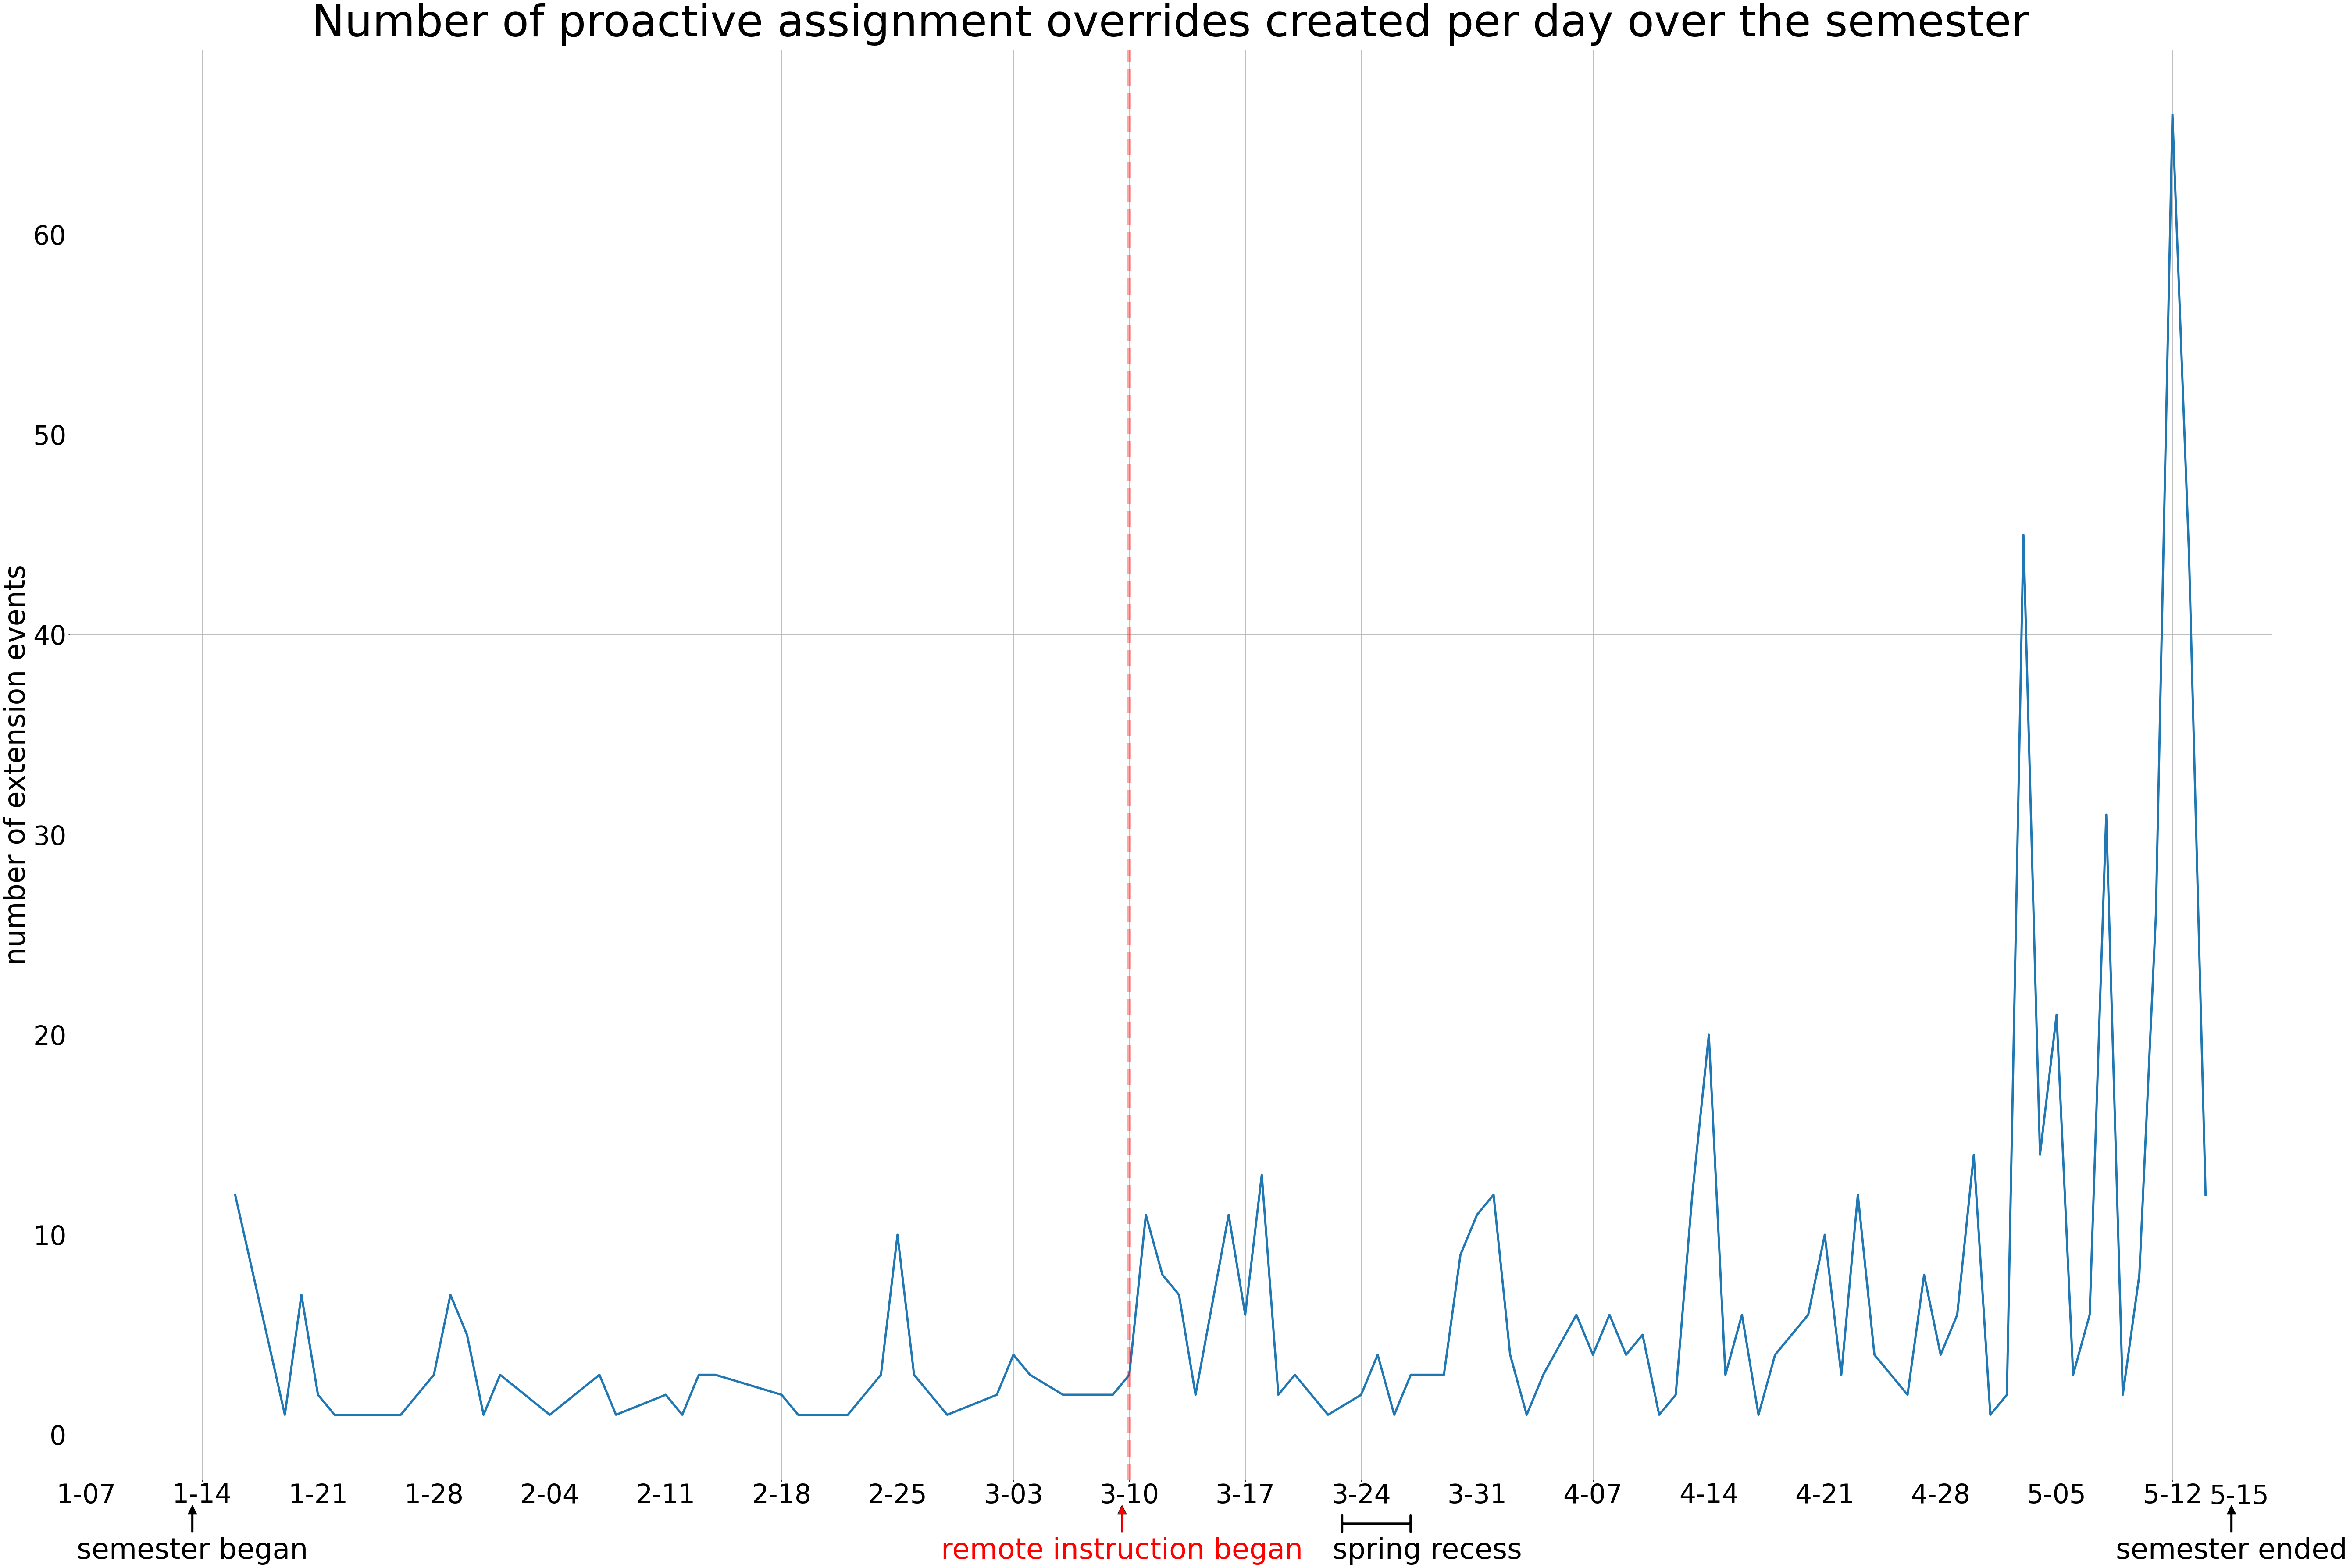

In [7]:

# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(overrides_time_20, linewidth=5.0, label='2020 Spring')
plt.plot(overrides_time_19, linewidth=5.0, label='2019 Spring', alpha=0)
plt.plot(overrides_time_18, linewidth=5.0, label='2018 Spring', alpha=0)
plt.plot(overrides_time_17, linewidth=5.0, label='2017 Spring', alpha=0)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Number of proactive assignment overrides created per day over the semester', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of extension events', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
#plt.legend(prop={'size': 70})
plt.show()

In [8]:
def assignments_override_reactive(term, start_date, end_date):
    # load assignments
    assignments = pd.read_csv(args.assignments, sep='\t', header=0)
    assignments = assignments.loc[assignments['assignment_id'].isin(assignments_with_submission), ['assignment_id', 'asn_due_at', 'asn_unlock_at']]  # no duplicate exists

    # calcuate assignments overrides before and after covid
    assignments_overrides = pd.read_csv(args.assignments_overrides, sep='\t', header=0)
    assignments_overrides = assignments_overrides.loc[assignments_overrides['workflow_state']=='active']
    assignments_overrides = assignments_overrides.loc[assignments_overrides['term_name']==term]
    # merge assignments with overrides
    assignments_overrides = pd.merge(assignments_overrides, assignments, on='assignment_id', how='inner')
    assignments_overrides = assignments_overrides.loc[(assignments_overrides['due_at'].notnull())&(assignments_overrides['created_at']>assignments_overrides['asn_unlock_at']), ['assignment_id', 'due_at', 'set_type', 'title', 'created_at', 'unlock_at', 'updated_at']]
    assignments_overrides['created_at'] = pd.to_datetime(assignments_overrides['created_at'], format='%Y-%m-%d %H:%M:%S.%f')
    #overrides_before = assignments_overrides.loc[(assignments_overrides['created_at']>'2020-01-14')&(assignments_overrides['created_at']<'2020-03-01')]

    # number of overrides per day before and after 2020-03-01
    #print('number of overrides per day before covid-19: ', len(overrides_before) / ((pd.to_datetime('2020-03-01') - pd.to_datetime('2020-01-14')) / np.timedelta64(1, 'D')))
    #overrides_after = assignments_overrides.loc[(assignments_overrides['created_at']>'2020-03-01')&(assignments_overrides['created_at']<'2020-05-25')]
    #print('number of overrides per day after covid-19: ', len(overrides_after) / ((pd.to_datetime('2020-5-25') - pd.to_datetime('2020-03-01')) / np.timedelta64(1, 'D')))
    assignments_overrides = assignments_overrides.loc[(assignments_overrides['created_at']>=start_date)&(assignments_overrides['created_at']<=end_date)]
    assignments_overrides['created_at'] = assignments_overrides['created_at'].apply(lambda x: x.date())
    time = assignments_overrides.groupby('created_at').size().reset_index()
    return time

overrides_time_20 = assignments_override_reactive(term_20, start_date_20, end_date_20)
overrides_time_19 = assignments_override_reactive(term_19, start_date_19, end_date_19)
overrides_time_18 = assignments_override_reactive(term_18, start_date_18, end_date_18)
overrides_time_17 = assignments_override_reactive(term_17, start_date_17, end_date_17)

In [9]:
overrides_time_20.set_index('created_at', inplace=True)
overrides_time_19['created_at'] = overrides_time_19['created_at'].apply(lambda x: x.replace(year=2020))
overrides_time_19.set_index('created_at', inplace=True)
overrides_time_18['created_at'] = overrides_time_18['created_at'].apply(lambda x: x.replace(year=2020))
overrides_time_18.set_index('created_at', inplace=True)
overrides_time_17['created_at'] = overrides_time_17['created_at'].apply(lambda x: x.replace(year=2020))
overrides_time_17.set_index('created_at', inplace=True)

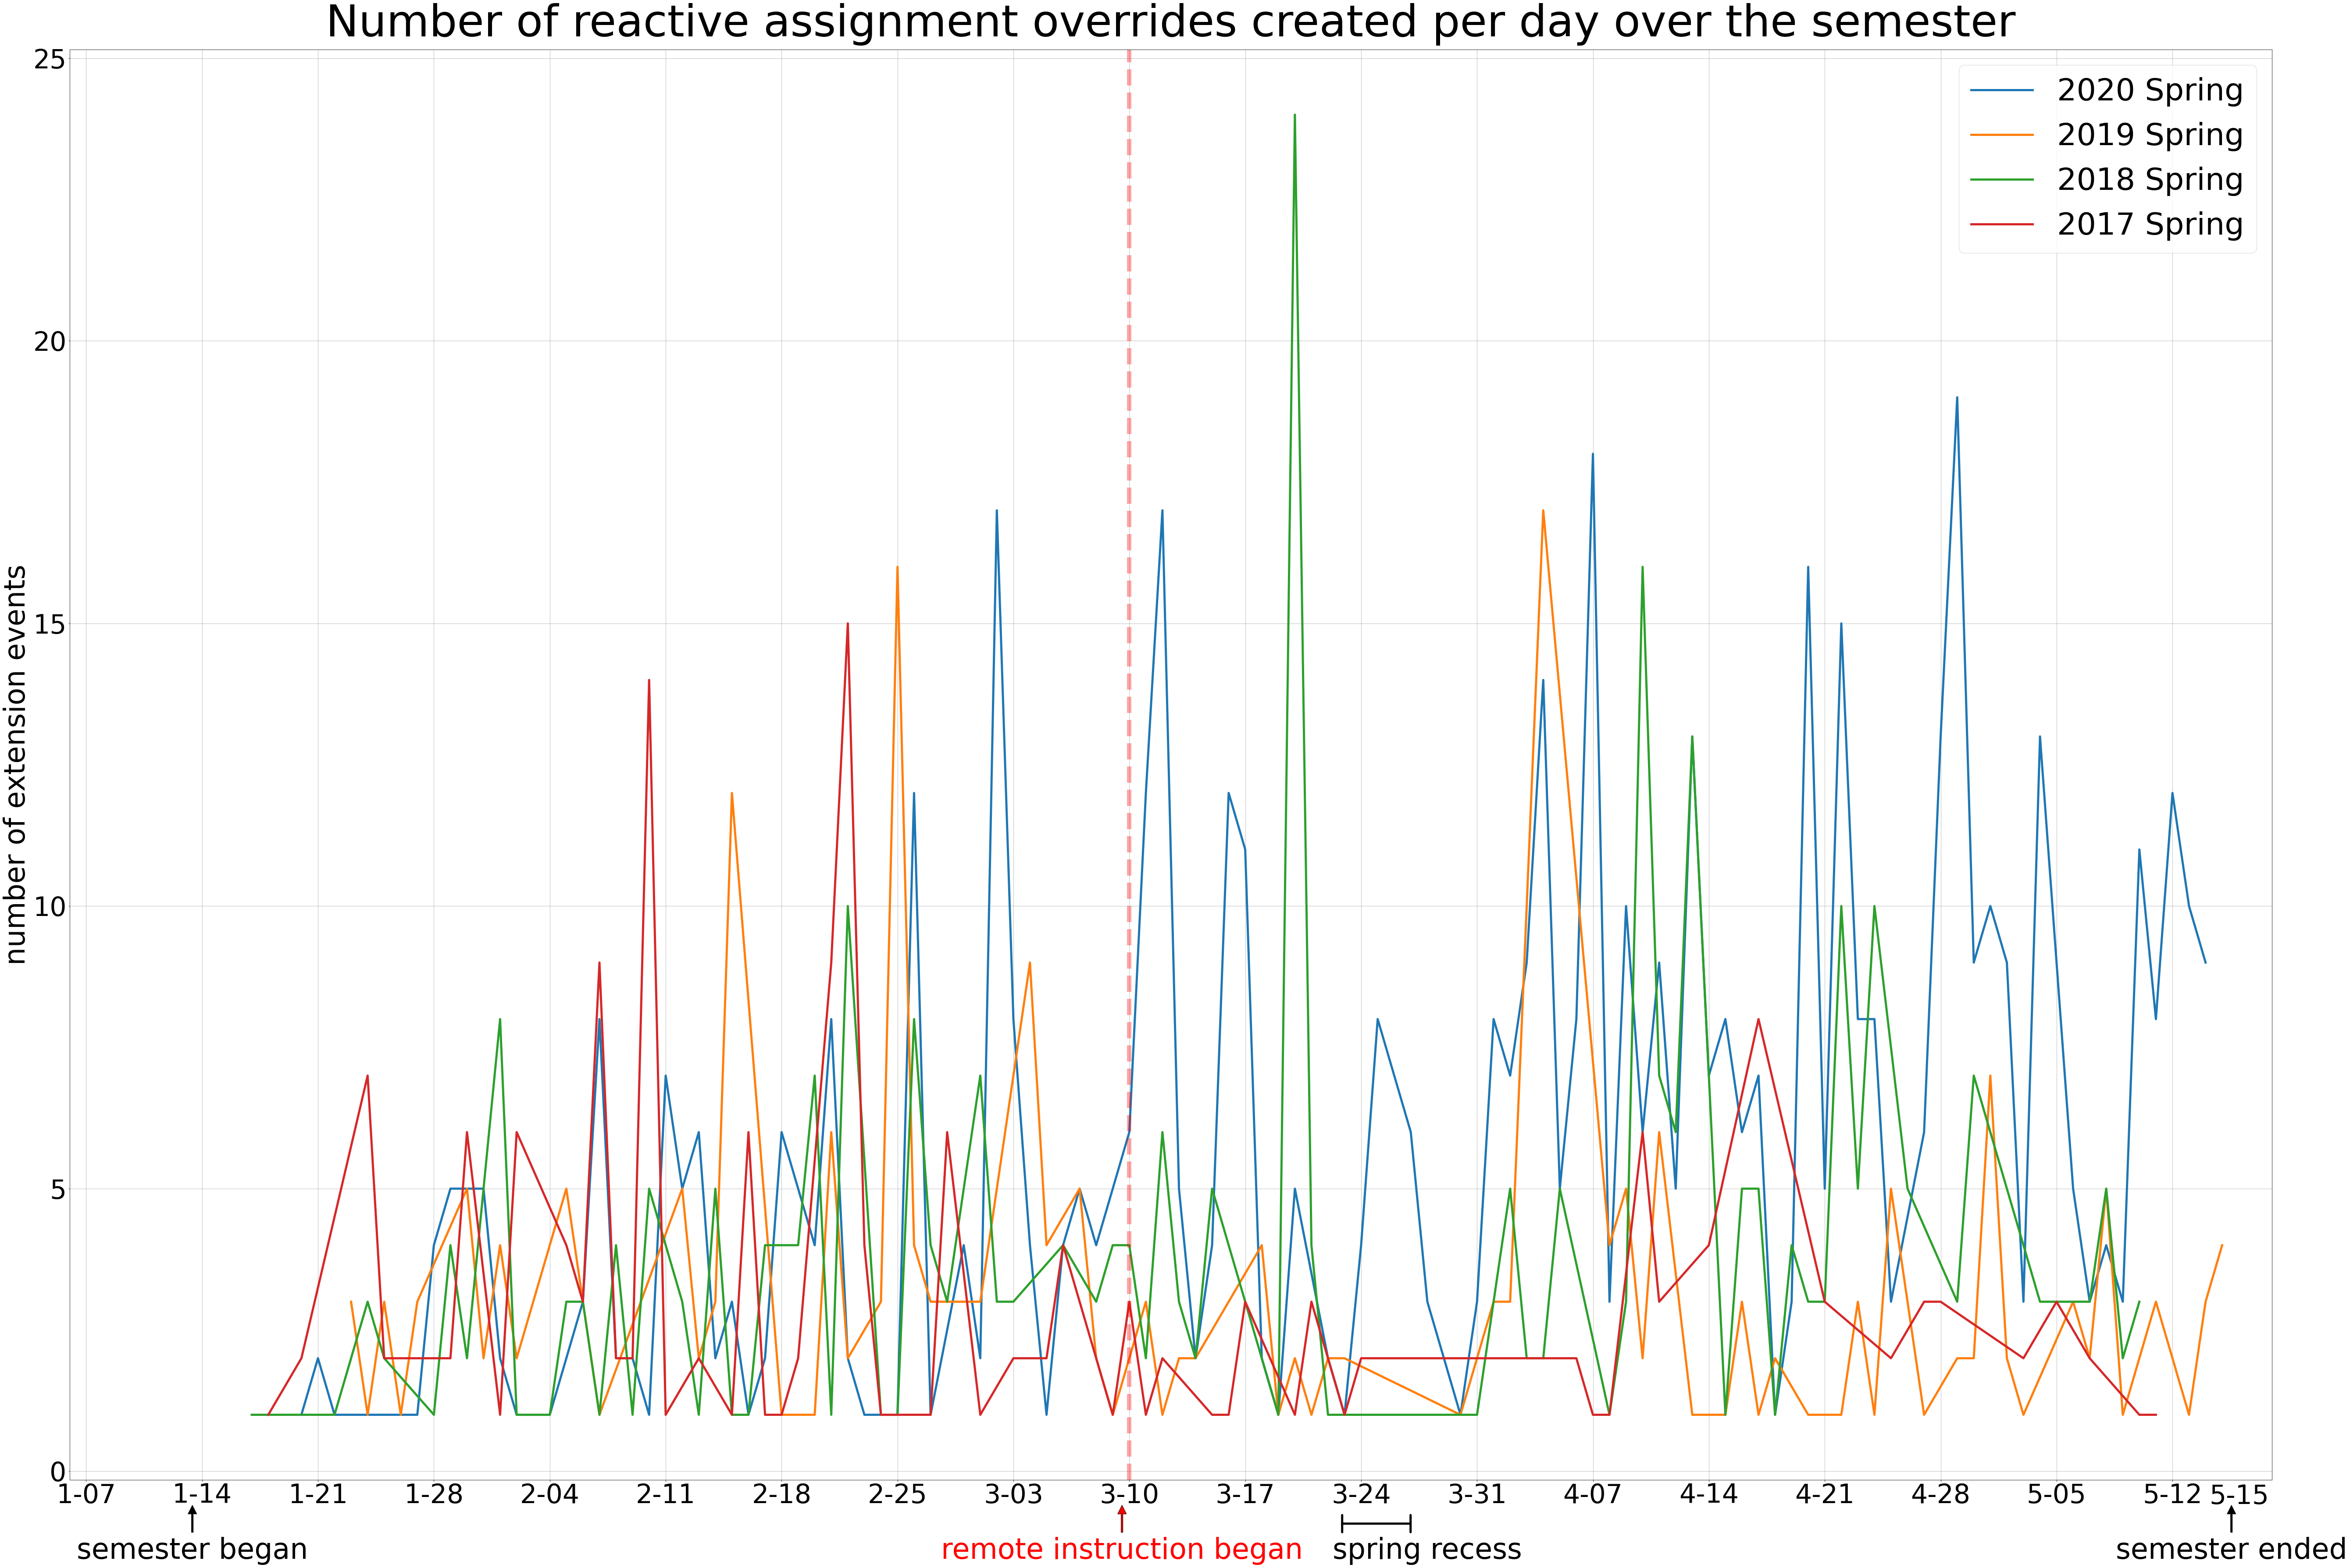

In [10]:

# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(overrides_time_20, linewidth=5.0, label='2020 Spring')
plt.plot(overrides_time_19, linewidth=5.0, label='2019 Spring')
plt.plot(overrides_time_18, linewidth=5.0, label='2018 Spring')
plt.plot(overrides_time_17, linewidth=5.0, label='2017 Spring')

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Number of reactive assignment overrides created per day over the semester', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of extension events', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
plt.legend(prop={'size': 70})
plt.show()

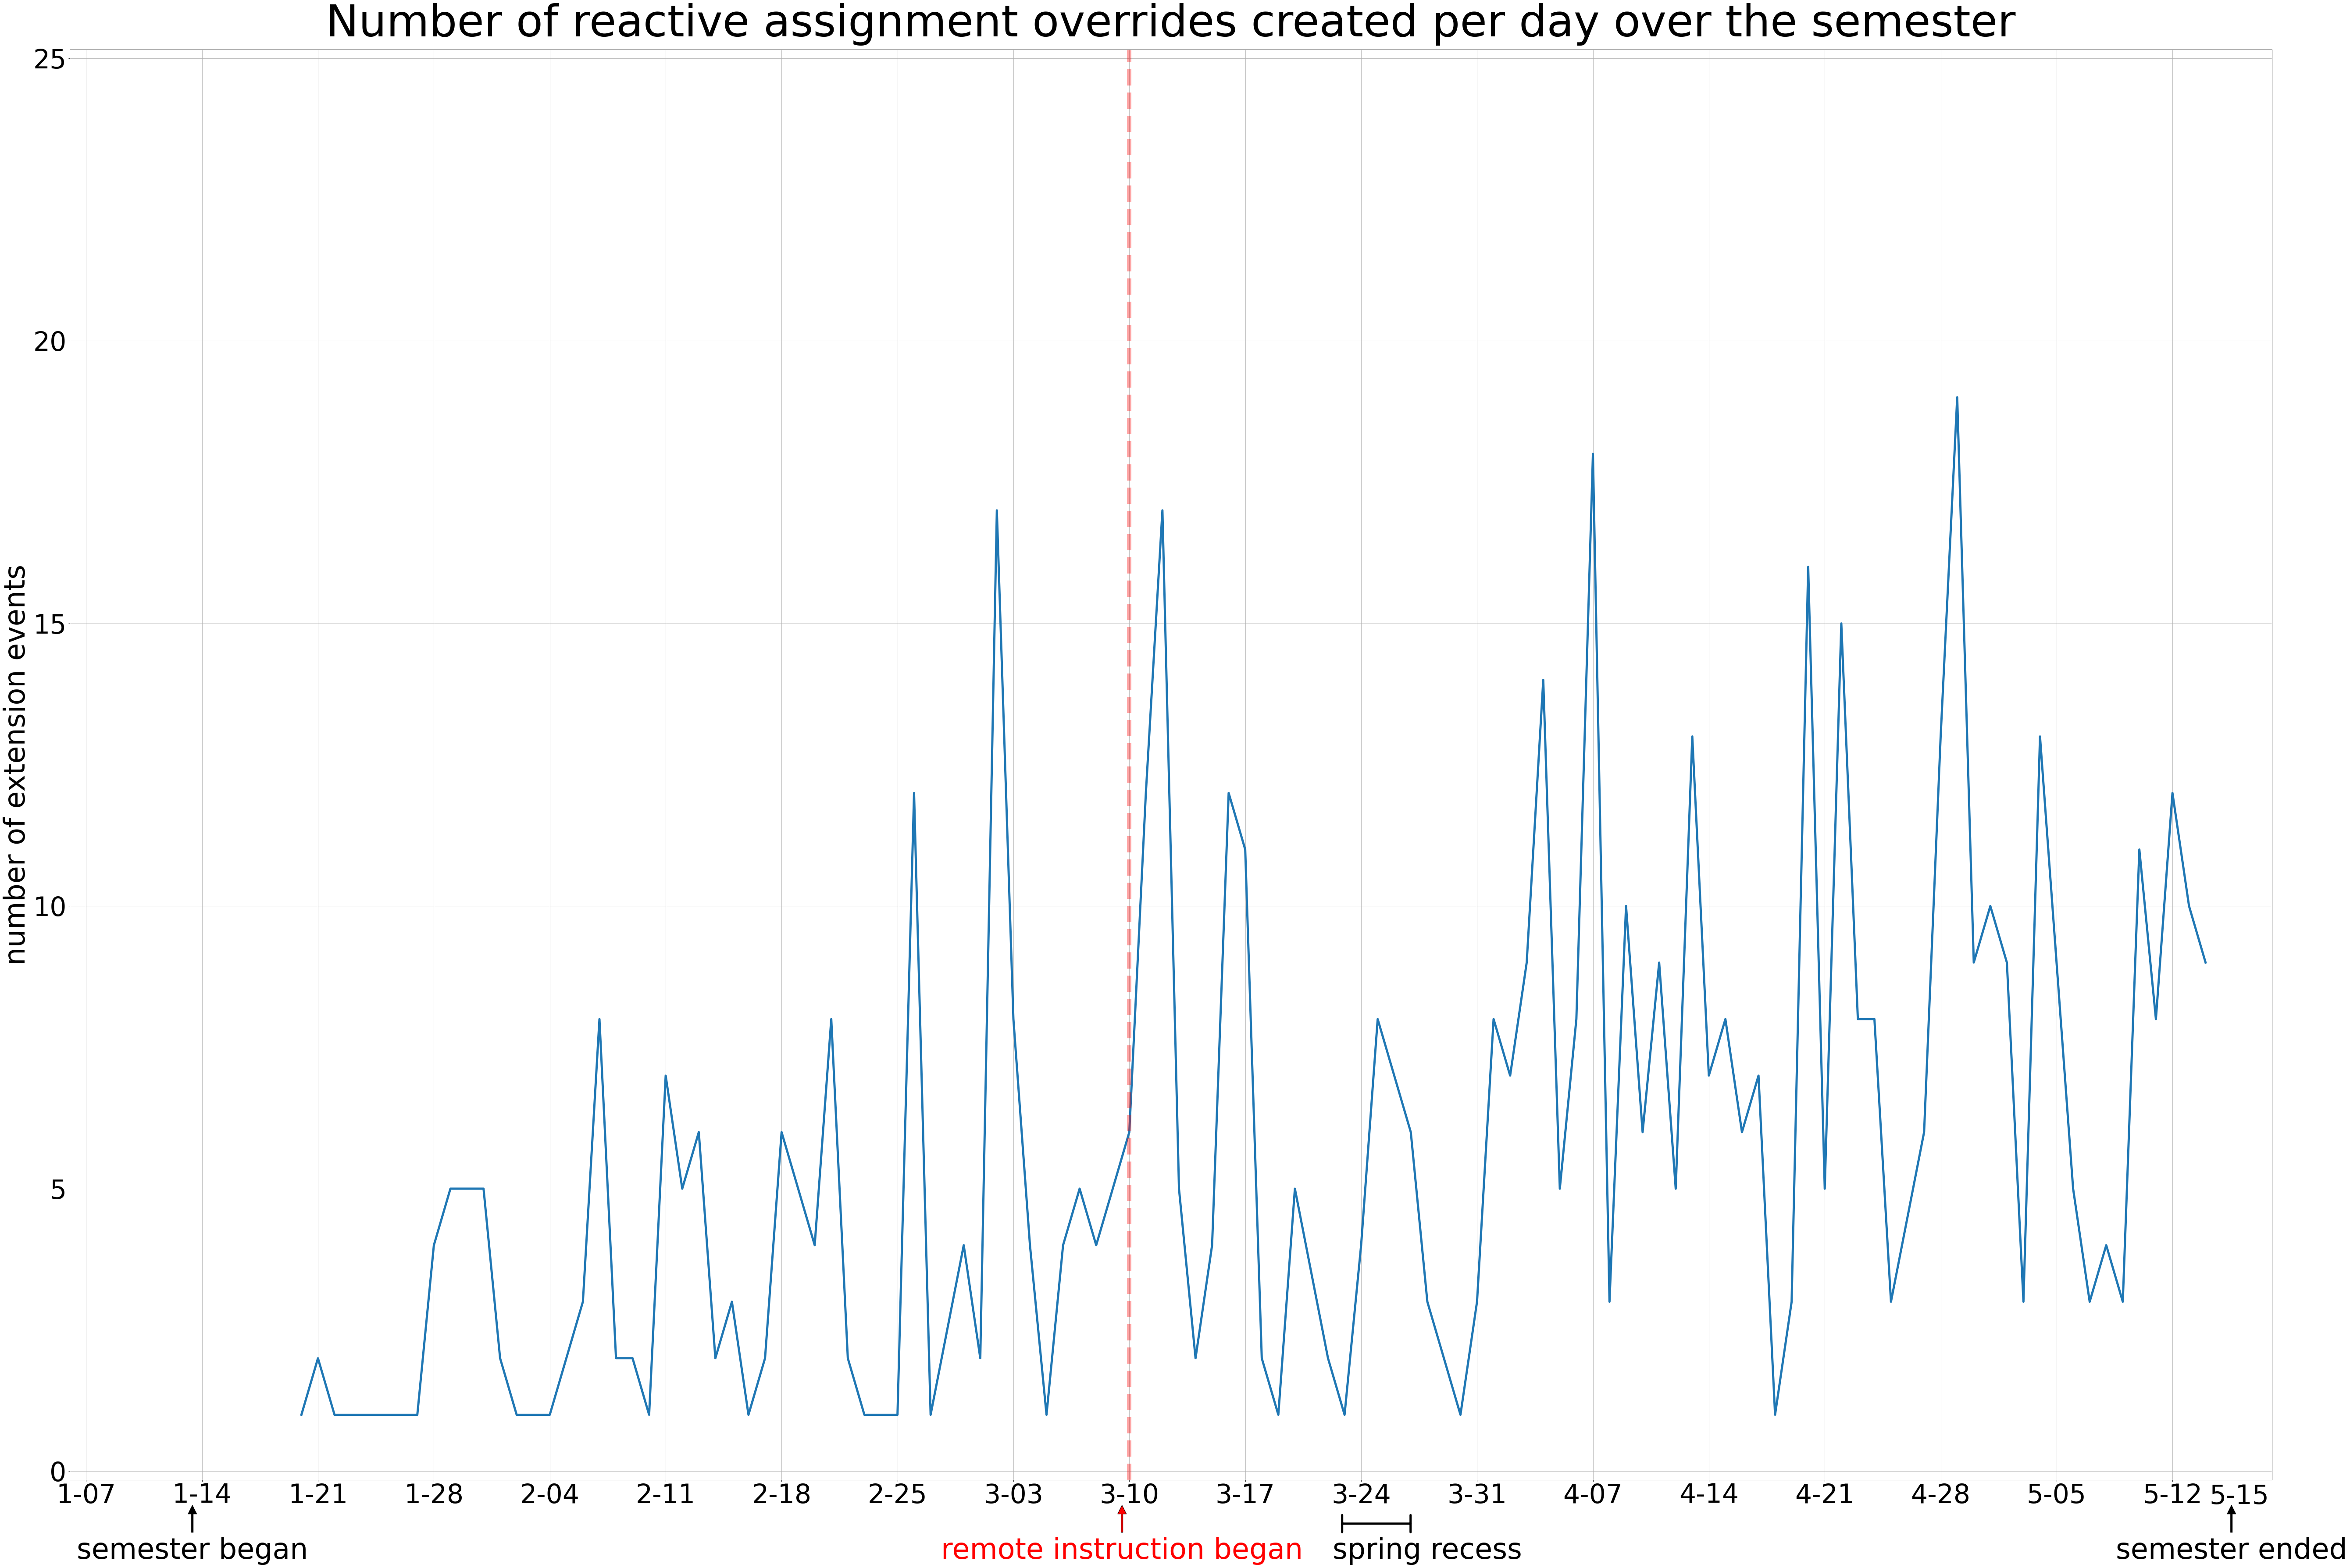

In [11]:

# set x-axis ticks
fig,ax = plt.subplots()
fig.patch.set_facecolor('white')
myFmt = mdates.DateFormatter('%-m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.set_xlim([datetime.date(2020, 1, 6), datetime.date(2020, 5, 18)])

plt.plot(overrides_time_20, linewidth=5.0, label='2020 Spring')
plt.plot(overrides_time_19, linewidth=5.0, label='2019 Spring', alpha=0)
plt.plot(overrides_time_18, linewidth=5.0, label='2018 Spring', alpha=0)
plt.plot(overrides_time_17, linewidth=5.0, label='2017 Spring', alpha=0)

plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Number of reactive assignment overrides created per day over the semester', fontsize=100, pad=30)
#plt.xlabel('date', fontsize=65, labelpad=120)
plt.ylabel('number of extension events', fontsize=65)

# annotation on x-axis

ax.annotate('semester began', fontsize=65, xy=(280, -50), xytext=(280, -180), xycoords='axes points', ha='center',
           arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('remote instruction began', color='red', fontsize=65, xy=(2400, -50), xytext=(2400, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='red', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('semester ended', fontsize=65, xy=(4930, -50), xytext=(4930, -180), xycoords='axes points', ha='center', arrowprops=dict(facecolor='black', shrink=0.1, headlength=20, headwidth=20))
ax.annotate('5-15', fontsize=60, xy=(4880, -55), xycoords='axes points')

ax.annotate('', fontsize=65, xy=(2900, -100), xytext=(3060, -100),
            xycoords='axes points',
            arrowprops=dict(arrowstyle='|-|,widthA=0.3,widthB=0.3', linewidth=5))
ax.annotate('spring recess', fontsize=65, xy=(2880, -180), xycoords='axes points')
plt.axvline(x=datetime.date(2020, 3, 10), color = 'r', linewidth=10, alpha=0.35, linestyle='--')
#plt.legend(prop={'size': 70})
plt.show()